## Data Acquisition

Install library pandas untuk proses manipulasi data

In [1]:
import pandas as pd

Mengunduh seluruh dataset yang diperlukan

In [4]:
test = pd.read_csv('/Users/whs9801/Downloads/home-credit-default-risk/dataset/application_test.csv')
train = pd.read_csv('/Users/whs9801/Downloads/home-credit-default-risk/dataset/application_train.csv')
bureau = pd.read_csv('/Users/whs9801/Downloads/home-credit-default-risk/dataset/bureau.csv')
bureau_balance = pd.read_csv('/Users/whs9801/Downloads/home-credit-default-risk/dataset/bureau_balance.csv')
credit_card_balance = pd.read_csv('/Users/whs9801/Downloads/home-credit-default-risk/dataset/credit_card_balance.csv')
installments_payments = pd.read_csv('/Users/whs9801/Downloads/home-credit-default-risk/dataset/installments_payments.csv')
POS_CASH_balance = pd.read_csv('/Users/whs9801/Downloads/home-credit-default-risk/dataset/POS_CASH_balance.csv')
previous_application = pd.read_csv('/Users/whs9801/Downloads/home-credit-default-risk/dataset/previous_application.csv')
sample_submission = pd.read_csv('/Users/whs9801/Downloads/home-credit-default-risk/home-credit/sample_submission.csv')

In [5]:
print(len(test.columns))
print(len(train.columns))

121
122


In [6]:
test.columns.values

array(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG'

Berdasarkan cell dibawah, dapat diamati bahwa distribusi *target* tidak seimbang, dengan sebagian besar bernilai 0. Hal ini apabila dibiarkan dapat mengakibatkan overfitting pada data testing. Oleh karena itu, perlu dilakukan resampling, yang dalam hal ini akan dilakukan setelah *train-test split*

In [11]:
train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [19]:
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


In [13]:
bureau_balance

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


In [15]:
installments_payments

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [16]:
installments_payments['SK_ID_PREV'].nunique()

997752

In [17]:
POS_CASH_balance

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


In [15]:
POS_CASH_balance['SK_ID_PREV'].nunique()

936325

In [18]:
previous_application

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [11]:
previous_application['SK_ID_PREV'].nunique()

1670214

In [ ]:
credit_card_balance

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [13]:
credit_card_balance['SK_ID_CURR'].nunique()

103558

In [30]:
for i in train.columns:
    print(i, train[i].nunique())

SK_ID_CURR 307511
TARGET 2
NAME_CONTRACT_TYPE 2
CODE_GENDER 3
FLAG_OWN_CAR 2
FLAG_OWN_REALTY 2
CNT_CHILDREN 15
AMT_INCOME_TOTAL 2548
AMT_CREDIT 5603
AMT_ANNUITY 13672
AMT_GOODS_PRICE 1002
NAME_TYPE_SUITE 7
NAME_INCOME_TYPE 8
NAME_EDUCATION_TYPE 5
NAME_FAMILY_STATUS 6
NAME_HOUSING_TYPE 6
REGION_POPULATION_RELATIVE 81
DAYS_BIRTH 17460
DAYS_EMPLOYED 12574
DAYS_REGISTRATION 15688
DAYS_ID_PUBLISH 6168
OWN_CAR_AGE 62
FLAG_MOBIL 2
FLAG_EMP_PHONE 2
FLAG_WORK_PHONE 2
FLAG_CONT_MOBILE 2
FLAG_PHONE 2
FLAG_EMAIL 2
OCCUPATION_TYPE 18
CNT_FAM_MEMBERS 17
REGION_RATING_CLIENT 3
REGION_RATING_CLIENT_W_CITY 3
WEEKDAY_APPR_PROCESS_START 7
HOUR_APPR_PROCESS_START 24
REG_REGION_NOT_LIVE_REGION 2
REG_REGION_NOT_WORK_REGION 2
LIVE_REGION_NOT_WORK_REGION 2
REG_CITY_NOT_LIVE_CITY 2
REG_CITY_NOT_WORK_CITY 2
LIVE_CITY_NOT_WORK_CITY 2
ORGANIZATION_TYPE 58
EXT_SOURCE_1 114584
EXT_SOURCE_2 119831
EXT_SOURCE_3 814
APARTMENTS_AVG 2339
BASEMENTAREA_AVG 3780
YEARS_BEGINEXPLUATATION_AVG 285
YEARS_BUILD_AVG 149
COMMONARE

In [31]:
for i in train.columns:
    print(i, train[i].dtype)

SK_ID_CURR int64
TARGET int64
NAME_CONTRACT_TYPE object
CODE_GENDER object
FLAG_OWN_CAR object
FLAG_OWN_REALTY object
CNT_CHILDREN int64
AMT_INCOME_TOTAL float64
AMT_CREDIT float64
AMT_ANNUITY float64
AMT_GOODS_PRICE float64
NAME_TYPE_SUITE object
NAME_INCOME_TYPE object
NAME_EDUCATION_TYPE object
NAME_FAMILY_STATUS object
NAME_HOUSING_TYPE object
REGION_POPULATION_RELATIVE float64
DAYS_BIRTH int64
DAYS_EMPLOYED int64
DAYS_REGISTRATION float64
DAYS_ID_PUBLISH int64
OWN_CAR_AGE float64
FLAG_MOBIL int64
FLAG_EMP_PHONE int64
FLAG_WORK_PHONE int64
FLAG_CONT_MOBILE int64
FLAG_PHONE int64
FLAG_EMAIL int64
OCCUPATION_TYPE object
CNT_FAM_MEMBERS float64
REGION_RATING_CLIENT int64
REGION_RATING_CLIENT_W_CITY int64
WEEKDAY_APPR_PROCESS_START object
HOUR_APPR_PROCESS_START int64
REG_REGION_NOT_LIVE_REGION int64
REG_REGION_NOT_WORK_REGION int64
LIVE_REGION_NOT_WORK_REGION int64
REG_CITY_NOT_LIVE_CITY int64
REG_CITY_NOT_WORK_CITY int64
LIVE_CITY_NOT_WORK_CITY int64
ORGANIZATION_TYPE object
EXT_SOUR

In [32]:
train['CODE_GENDER']

0         M
1         F
2         M
3         F
4         M
         ..
307506    M
307507    F
307508    F
307509    F
307510    F
Name: CODE_GENDER, Length: 307511, dtype: object

## Data Pre-processing

**Check Missing Values**

In [22]:
len(train)

307511

In [33]:
train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [23]:
len(test)

48744

In [21]:
test.isnull().sum()

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64

In [24]:
bureau.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [25]:
bureau_balance.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [26]:
credit_card_balance.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

In [27]:
installments_payments.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

In [28]:
POS_CASH_balance.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [29]:
previous_application.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

**Feature Encoding**

Pada tahapan ini, strategi yang digunakan adalah menggunakan Label Encoder untuk mengubah fitur dengan tipe data *object* menjadi *integer*. Penggunaan Label Encoder tidak menambah jumlah kolom (tidak seperti One-Hot Encoder) sehingga efisien pada kasus ini

In [6]:
from sklearn.preprocessing import LabelEncoder

dataset = [test, train, bureau, bureau_balance, credit_card_balance, installments_payments, POS_CASH_balance, previous_application]

label_encoder = LabelEncoder()

for i in dataset:
    for j in i.columns:
        if i[j].dtype == 'object':
            i[j] = label_encoder.fit_transform(i[j])        

**Missing Value Handling**

Berdasarkan hasil yang didapat pada cell-cell sebelumnya, dapat diamati bahwa terdapat banyak missing value pada hampir seluruh dataset. Oleh karena itu strategi yang digunakan untuk mengatasi missing value tersebut adalah sebagai berikut:

1. Melihat apakah jumlah missing value lebih banyak dibanding jumlah data yang ada (bukan missing value) pada kolom tertentu. Apabila kondisinya demikian, maka kolom tersebut akan di drop

2. Apabila jumlah missing value lebih sedikit dibanding not missing value, perhatikan apakah keseluruhan data kolom memiliki distribusi normal atau tidak. Jika memiliki distribusi normal, akan diisi menggunakan mean dari data kolom tersebut, sedangkan apabila tidak berdistribusi normal maka akan diisi menggunakan nilai median.

3. Pengecekan distribusi normal dilakukan menggunakan Shapiro-Wilk Test. Apabila nilai *p* yang dihasilkan kurang dari 0.05, maka dataset tidak terdistribusi normal, demikian sebaliknya

In [7]:
from scipy.stats import shapiro 
from scipy.stats import lognorm

dataset1 = [bureau, bureau_balance, credit_card_balance, installments_payments, POS_CASH_balance, previous_application]

dataset2 = [train, test]

for i in dataset1:
    for j in i.columns:
        if i[j].isnull().sum() >= len(i) / 2:
            i.drop(j, axis = 1, inplace = True)
        elif shapiro(i[j])[1] < 0.05:
            i[j].fillna(i[j].median(), inplace = True)
        else:
            i[j].fillna(i[j].mean(), inplace = True)

for i in dataset2:
    for j in i.columns:
        if shapiro(i[j])[1] < 0.05:
            i[j].fillna(i[j].median(), inplace = True)
        else:
            i[j].fillna(i[j].mean(), inplace = True)

/Users/whs9801/miniforge3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/whs9801/miniforge3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/whs9801/miniforge3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/whs9801/miniforge3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/whs9801/miniforge3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate f

## Data Visualization

**Bar Plot**

Visualisasi ini dilakukan guna mempertegas kondisi bahwa fitur *target* pada dataset memiliki distribusi yang imbalans

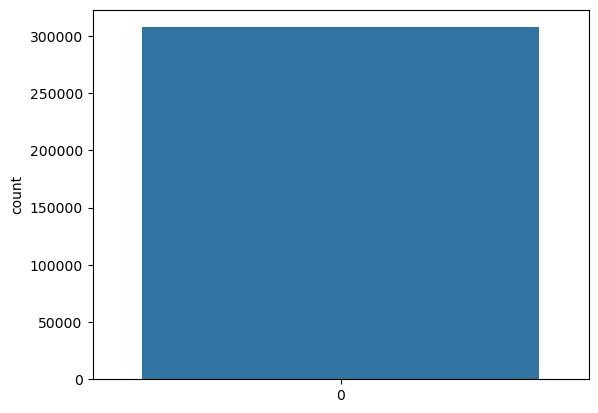

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(train['TARGET'])
plt.show()

**Heat Map**

Fitur yang terdapat pada dataset training sangatlah banyak, yakni sebanyak 108. Hal tersebut mengakibatkan visualisasi Heat Map menghasilkan gambar yang tidak begitu terlihat

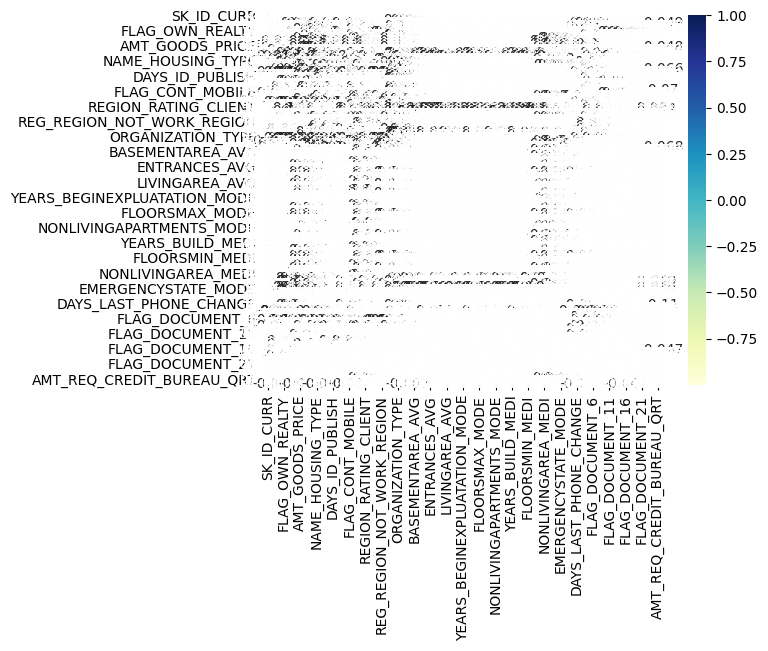

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt 

dataplot = sns.heatmap(train.corr(), cmap="YlGnBu", annot=True) 
  
# displaying heatmap 
plt.show() 

In [67]:
train.corr()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,0.001654,-0.000769,0.001216,0.000703,-0.001129,-0.001820,-0.000343,-0.000433,...,0.000509,0.000167,0.001073,0.000282,-0.002486,-0.002040,0.001953,0.000452,0.000954,0.004335
TARGET,-0.002108,1.000000,-0.030896,0.054692,-0.021851,-0.006148,0.019187,-0.003982,-0.030369,-0.012817,...,-0.007952,-0.001358,0.000215,0.003709,0.000848,0.002464,0.000718,-0.011356,-0.001842,0.018160
NAME_CONTRACT_TYPE,0.001654,-0.030896,1.000000,-0.008613,0.004022,0.067177,0.029998,-0.003531,-0.221648,-0.241543,...,-0.007530,-0.005190,-0.007308,0.055821,0.000418,-0.004732,-0.014144,-0.013286,-0.020307,-0.048539
CODE_GENDER,-0.000769,0.054692,-0.008613,1.000000,0.345833,-0.044340,0.047403,0.074728,0.021572,0.076960,...,0.022205,0.004632,0.003258,0.023908,0.002945,0.001055,-0.001454,0.008306,-0.006921,-0.016893
FLAG_OWN_CAR,0.001216,-0.021851,0.004022,0.345833,1.000000,-0.002817,0.102023,0.083383,0.116225,0.141586,...,-0.000097,0.002184,0.007299,0.006741,0.002496,0.000535,0.000227,0.019149,-0.009291,-0.033988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.002040,0.002464,-0.004732,0.001055,0.000535,-0.008645,-0.000342,0.002868,0.003964,0.002018,...,0.012675,0.001076,-0.000119,-0.001027,0.230374,1.000000,0.217412,-0.005258,-0.004416,-0.003355
AMT_REQ_CREDIT_BUREAU_WEEK,0.001953,0.000718,-0.014144,-0.001454,0.000227,0.006972,-0.002277,0.002326,-0.001192,0.012815,...,-0.004428,-0.001218,-0.001765,0.000074,0.004706,0.217412,1.000000,-0.014096,-0.015115,0.018917
AMT_REQ_CREDIT_BUREAU_MON,0.000452,-0.011356,-0.013286,0.008306,0.019149,-0.004180,-0.010101,0.024063,0.050934,0.036148,...,-0.001493,-0.002607,0.001280,-0.003281,-0.000018,-0.005258,-0.014096,1.000000,-0.007789,-0.004975
AMT_REQ_CREDIT_BUREAU_QRT,0.000954,-0.001842,-0.020307,-0.006921,-0.009291,0.014414,-0.007324,0.004734,0.014896,0.009348,...,-0.004891,-0.001505,-0.001007,-0.001821,-0.002716,-0.004416,-0.015115,-0.007789,1.000000,0.076208


**Scatter Plot**

Dari cell dibawah, terlihat bahwa terdapat sejumlah fitur yang memiliki korelasi cukup tinggi satu sama lain. Hal ini dapat menjadi dasar untuk drop fitur tersebut karena korelasi yang tinggi dengan fitur non-target berimbas pada hasil prediksi yang tidak akurat

In [80]:
for i in train.columns:
    for j in train.columns:
        if train[i].corr(train[j]) > 0.5 and i != j:
            print(i, j, train[i].corr(train[j]))

AMT_CREDIT AMT_ANNUITY 0.7701265817644214
AMT_ANNUITY AMT_CREDIT 0.7701265817644214
DAYS_BIRTH FLAG_EMP_PHONE 0.619887696202353
DAYS_EMPLOYED OCCUPATION_TYPE 0.5486999742974888
DAYS_EMPLOYED ORGANIZATION_TYPE 0.6304793258981816
DAYS_EMPLOYED FLAG_DOCUMENT_6 0.5974844373735059
FLAG_EMP_PHONE DAYS_BIRTH 0.619887696202353
OCCUPATION_TYPE DAYS_EMPLOYED 0.5486999742974888
REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION 0.8606267802832693
LIVE_REGION_NOT_WORK_REGION REG_REGION_NOT_WORK_REGION 0.8606267802832693
REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY 0.8255747229688973
LIVE_CITY_NOT_WORK_CITY REG_CITY_NOT_WORK_CITY 0.8255747229688972
ORGANIZATION_TYPE DAYS_EMPLOYED 0.6304793258981816
YEARS_BEGINEXPLUATATION_AVG YEARS_BEGINEXPLUATATION_MODE 0.9718933677077903
YEARS_BEGINEXPLUATATION_AVG YEARS_BEGINEXPLUATATION_MEDI 0.9938254172943544
FLOORSMAX_AVG FLOORSMAX_MODE 0.9856894240021485
FLOORSMAX_AVG FLOORSMAX_MEDI 0.9970341420349668
FLOORSMAX_AVG TOTALAREA_MODE 0.6246458458475773
YEA

Dapat dilihat dari sejumlah cell dibawah ini bahwa memang terdapat sejumlah fitur yang memiliki korelasi tinggi satu sama lain

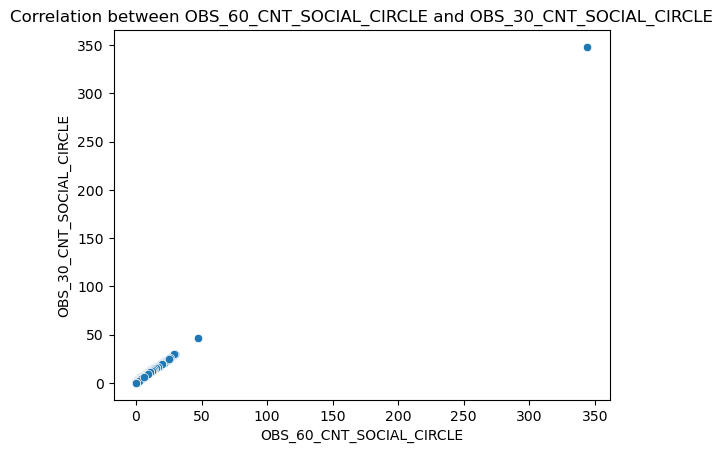

In [75]:
sns.scatterplot(x = 'OBS_60_CNT_SOCIAL_CIRCLE', y = 'OBS_30_CNT_SOCIAL_CIRCLE', data = train)
x = 'OBS_60_CNT_SOCIAL_CIRCLE'
y = 'OBS_30_CNT_SOCIAL_CIRCLE'
plt.title(f"Correlation between {x} and {y}")
plt.show()

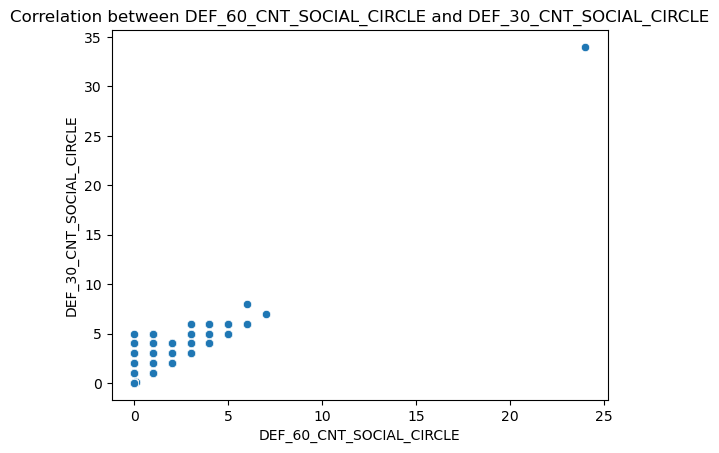

In [76]:
sns.scatterplot(x = 'DEF_60_CNT_SOCIAL_CIRCLE', y = 'DEF_30_CNT_SOCIAL_CIRCLE', data = train)
x = 'DEF_60_CNT_SOCIAL_CIRCLE'
y = 'DEF_30_CNT_SOCIAL_CIRCLE'
plt.title(f"Correlation between {x} and {y}")
plt.show()

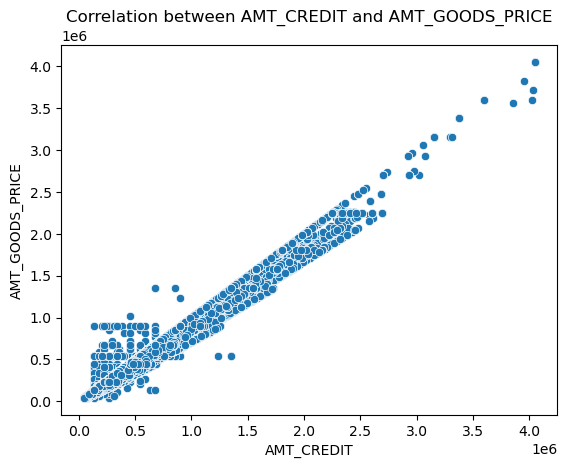

In [77]:
sns.scatterplot(x = 'AMT_CREDIT', y = 'AMT_GOODS_PRICE', data = train)
x = 'AMT_CREDIT'
y = 'AMT_GOODS_PRICE'
plt.title(f"Correlation between {x} and {y}")
plt.show()

**Create and Drop Features**

Pada tahapan ini kita membuat fitur baru dari sejumlah fitur yang memiliki korelasi tinggi serta kemudian menghapus fitur tersebut, menyisakan fitur yang baru dibuat

In [43]:
dataset = [train, test]

for i in dataset:
    i['cred_goods_price'] = i['AMT_CREDIT']/i['AMT_GOODS_PRICE']
    i['cred_goods_price'] = i['cred_goods_price'].fillna(i['cred_goods_price'].mean())
    i['region_ratio'] = i['REGION_RATING_CLIENT'] / i['REGION_RATING_CLIENT_W_CITY']
    i['region_ratio'] = i['region_ratio'].fillna(i['region_ratio'].mean())
    i['OBS_30_60_avg'] = (i['OBS_30_CNT_SOCIAL_CIRCLE'] + i['OBS_60_CNT_SOCIAL_CIRCLE'])/2
    i['DEF_30_60_avg'] = (i['DEF_30_CNT_SOCIAL_CIRCLE'] + i['DEF_60_CNT_SOCIAL_CIRCLE'])/2
    i.drop(['SK_ID_CURR','CNT_CHILDREN', 'AMT_CREDIT', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 
            'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
            'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
            'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
            'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'WALLSMATERIAL_MODE',
            'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
            'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
            'DEF_60_CNT_SOCIAL_CIRCLE'], axis = 1, inplace = True)

**Grouping**

In [77]:
pc = POS_CASH_balance.groupby('SK_ID_PREV').mean()
pc

,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
SK_ID_PREV,,,,,,,
1000001,158271.0,-9.0,8.666667,7.666667,1.333333,0.0,0.0
1000002,101962.0,-52.0,5.200000,2.000000,0.800000,0.0,0.0
1000003,252457.0,-2.5,12.000000,10.500000,0.000000,0.0,0.0
1000004,260094.0,-25.5,9.625000,6.125000,0.500000,0.0,0.0
1000005,176456.0,-51.0,10.000000,5.000000,0.363636,0.0,0.0
...,...,...,...,...,...,...,...
2843494,292375.0,-25.0,32.666667,31.666667,1.333333,0.0,0.0
2843495,260963.0,-12.5,53.375000,49.875000,0.500000,0.0,0.0
2843497,451578.0,-11.0,24.000000,14.000000,0.000000,0.0,0.0


In [78]:
ip = installments_payments.groupby('SK_ID_PREV').mean()
ip 

,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
SK_ID_PREV,,,,,,,
1000001,158271.0,1.500000,1.500000,-253.000000,-269.000000,34221.712500,34221.712500
1000002,101962.0,1.250000,2.500000,-1555.000000,-1574.750000,9308.891250,9308.891250
1000003,252457.0,1.000000,2.000000,-64.000000,-79.333333,4951.350000,4951.350000
1000004,260094.0,1.142857,4.000000,-772.000000,-798.714286,4789.022143,4789.022143
1000005,176456.0,1.000000,5.818182,-1543.454545,-1551.909091,14703.210000,13365.609545
...,...,...,...,...,...,...,...
2843495,260963.0,1.142857,4.000000,-349.000000,-352.857143,113932.883571,113932.883571
2843496,425374.0,0.000000,16.235294,-258.058824,-262.058824,9186.311912,8950.975147
2843497,451578.0,1.000000,10.500000,-303.000000,-305.900000,9175.185000,9175.185000


In [79]:
cc = credit_card_balance.groupby('SK_ID_PREV').mean()
cc

,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
SK_ID_PREV,,,,,,,,,,,,,,,,,,,,,
1000018,394447.0,-4.0,74946.285000,81000.000000,5400.000000,29478.996000,0.000000,24078.996000,2594.088000,5541.750000,...,73602.585000,73602.585000,1.200000,8.800000,0.000000,7.600000,2.000000,0.0,0.000000,0.000000
1000030,361282.0,-4.5,55991.064375,81562.500000,1307.665603,17257.438125,36.021198,17066.038731,2078.223750,6700.119713,...,55935.376875,55935.376875,0.163681,5.125000,0.000602,5.069935,1.875000,0.0,0.000000,0.000000
1000031,131335.0,-8.5,52394.439375,149625.000000,10961.498404,28959.615000,54.031797,19672.515909,2675.300625,24727.577551,...,52099.970625,52099.970625,0.308022,1.312500,0.000902,1.167402,3.687500,0.0,0.000000,0.000000
1000035,436351.0,-4.0,0.000000,225000.000000,5961.324822,0.000000,288.169582,2968.804848,0.000000,10280.537702,...,0.000000,0.000000,0.309449,0.000000,0.004812,0.559479,0.000000,0.0,0.000000,0.000000
1000077,181153.0,-7.0,0.000000,94090.909091,5961.324822,0.000000,288.169582,2968.804848,0.000000,10280.537702,...,0.000000,0.000000,0.309449,0.000000,0.004812,0.559479,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843476,197090.0,-49.0,37937.812263,161526.315789,947.368421,947.368421,0.000000,0.000000,3443.780368,3467.420053,...,38133.234947,38332.182316,0.021053,0.021053,0.000000,0.000000,33.989474,0.0,15.031579,3.473684
2843477,168439.0,-43.0,1663.076647,15882.352941,688.235294,688.235294,0.000000,0.000000,163.365460,955.265294,...,1644.714529,1644.714529,0.070588,0.070588,0.000000,0.000000,4.127354,0.0,0.000000,0.000000
2843478,424526.0,-46.5,5111.405000,21000.000000,1000.000000,1000.000000,0.000000,0.000000,489.650601,1355.795000,...,5097.742000,5097.742000,0.044444,0.044444,0.000000,0.000000,9.620279,0.0,0.000000,0.000000


In [58]:
ba = bureau_balance.groupby('SK_ID_BUREAU').mean()
ba

,MONTHS_BALANCE,STATUS
SK_ID_BUREAU,,
5001709,-48.0,6.113402
5001710,-41.0,6.000000
5001711,-1.5,1.750000
5001712,-9.0,2.842105
5001713,-10.5,7.000000
...,...,...
6842884,-23.5,5.270833
6842885,-11.5,2.500000
6842886,-16.0,4.545455


**Merging**

In [32]:
bureau_processed = bureau.join(ba, on = 'SK_ID_BUREAU')
bureau_processed

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,STATUS
0,215354,5714462,2,0,-497,0,-153.000000,-153.000000,0,91323.00,0.000000,6229.51498,0.0,3,-131,NaN,NaN
1,215354,5714463,0,0,-208,0,1075.000000,-1017.437148,0,225000.00,171342.000000,6229.51498,0.0,4,-20,NaN,NaN
2,215354,5714464,0,0,-203,0,528.000000,-1017.437148,0,464323.50,137085.119952,6229.51498,0.0,3,-16,NaN,NaN
3,215354,5714465,0,0,-203,0,510.517362,-1017.437148,0,90000.00,137085.119952,6229.51498,0.0,4,-16,NaN,NaN
4,215354,5714466,0,0,-629,0,1197.000000,-1017.437148,0,2700000.00,137085.119952,6229.51498,0.0,3,-21,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,0,0,-44,0,-30.000000,-1017.437148,0,11250.00,11250.000000,0.00000,0.0,10,-19,NaN,NaN
1716424,100044,5057754,2,0,-2648,0,-2433.000000,-2493.000000,0,38130.84,0.000000,0.00000,0.0,3,-2493,NaN,NaN
1716425,100044,5057762,2,0,-1809,0,-1628.000000,-970.000000,0,15570.00,137085.119952,6229.51498,0.0,3,-967,NaN,NaN
1716426,246829,5057770,2,0,-1878,0,-1513.000000,-1513.000000,0,36000.00,0.000000,0.00000,0.0,3,-1508,NaN,NaN


In [33]:
bureau_processed.isnull().sum()

SK_ID_CURR                     0
SK_ID_BUREAU                   0
CREDIT_ACTIVE                  0
CREDIT_CURRENCY                0
DAYS_CREDIT                    0
CREDIT_DAY_OVERDUE             0
DAYS_CREDIT_ENDDATE            0
DAYS_ENDDATE_FACT              0
CNT_CREDIT_PROLONG             0
AMT_CREDIT_SUM                 0
AMT_CREDIT_SUM_DEBT            0
AMT_CREDIT_SUM_LIMIT           0
AMT_CREDIT_SUM_OVERDUE         0
CREDIT_TYPE                    0
DAYS_CREDIT_UPDATE             0
MONTHS_BALANCE            942074
STATUS                    942074
dtype: int64

In [ ]:
bureau_processed.drop(['MONTHS_BALANCE', 'STATUS'], axis = 1, inplace = True)
bureau_processed

In [37]:
bureau_processed = bureau_processed.groupby('SK_ID_CURR').mean()
bureau_processed

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
SK_ID_CURR,,,,,,,,,,,,,,
100001,5896633.000,1.142857,0.0,-735.000000,0.0,82.428571,-907.758778,0.000000,2.076236e+05,85240.928571,889.930711,0.0,3.000000,-93.142857
100002,6153272.125,1.500000,0.0,-874.000000,0.0,-134.120659,-777.484287,0.000000,1.081319e+05,82129.544982,7113.328115,0.0,3.500000,-499.875000
100003,5885878.500,1.500000,0.0,-1400.750000,0.0,-544.500000,-1077.359287,0.000000,2.543501e+05,0.000000,202500.000000,0.0,3.500000,-816.000000
100004,6829133.500,2.000000,0.0,-867.000000,0.0,-488.500000,-532.500000,0.000000,9.451890e+04,0.000000,0.000000,0.0,3.000000,-532.000000
100005,6735201.000,0.666667,0.0,-190.666667,0.0,439.333333,-719.291432,0.000000,2.190420e+05,189469.500000,0.000000,0.0,3.333333,-54.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456249,5371700.000,1.692308,0.0,-1667.076923,0.0,-1098.267895,-1338.033627,0.000000,2.841430e+05,44178.950758,2875.160760,0.0,3.000000,-1064.538462
456250,6817237.000,0.666667,0.0,-862.000000,0.0,1288.333333,-931.624765,0.000000,1.028820e+06,744013.365000,19422.795000,0.0,3.333333,-60.333333
456253,5885018.500,1.000000,0.0,-867.500000,0.0,280.500000,-905.718574,0.000000,9.900000e+05,448958.250000,0.000000,0.0,3.250000,-253.250000


In [38]:
bureau_processed.drop('SK_ID_BUREAU', axis = 1, inplace = True)
bureau_processed

,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
SK_ID_CURR,,,,,,,,,,,,,
100001,1.142857,0.0,-735.000000,0.0,82.428571,-907.758778,0.000000,2.076236e+05,85240.928571,889.930711,0.0,3.000000,-93.142857
100002,1.500000,0.0,-874.000000,0.0,-134.120659,-777.484287,0.000000,1.081319e+05,82129.544982,7113.328115,0.0,3.500000,-499.875000
100003,1.500000,0.0,-1400.750000,0.0,-544.500000,-1077.359287,0.000000,2.543501e+05,0.000000,202500.000000,0.0,3.500000,-816.000000
100004,2.000000,0.0,-867.000000,0.0,-488.500000,-532.500000,0.000000,9.451890e+04,0.000000,0.000000,0.0,3.000000,-532.000000
100005,0.666667,0.0,-190.666667,0.0,439.333333,-719.291432,0.000000,2.190420e+05,189469.500000,0.000000,0.0,3.333333,-54.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456249,1.692308,0.0,-1667.076923,0.0,-1098.267895,-1338.033627,0.000000,2.841430e+05,44178.950758,2875.160760,0.0,3.000000,-1064.538462
456250,0.666667,0.0,-862.000000,0.0,1288.333333,-931.624765,0.000000,1.028820e+06,744013.365000,19422.795000,0.0,3.333333,-60.333333
456253,1.000000,0.0,-867.500000,0.0,280.500000,-905.718574,0.000000,9.900000e+05,448958.250000,0.000000,0.0,3.250000,-253.250000


In [39]:
train_processed = train.join(bureau_processed, on = 'SK_ID_CURR', how = 'left')
train_processed 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0.0,-134.120659,-777.484287,0.000000,108131.945625,82129.544982,7113.328115,0.0,3.500000,-499.875000
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0.0,-544.500000,-1077.359287,0.000000,254350.125000,0.000000,202500.000000,0.0,3.500000,-816.000000
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0.0,-488.500000,-532.500000,0.000000,94518.900000,0.000000,0.000000,0.0,3.000000,-532.000000
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0.0,-783.000000,-783.000000,0.000000,146250.000000,0.000000,0.000000,0.0,3.000000,-783.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,1,0,0,0,157500.0,254700.0,27558.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,0,0,0,1,0,72000.0,269550.0,12001.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,0,0,0,1,0,153000.0,677664.0,29979.0,...,0.0,280.500000,-905.718574,0.000000,990000.000000,448958.250000,0.000000,0.0,3.250000,-253.250000
307509,456254,1,0,0,0,1,0,171000.0,370107.0,20205.0,...,0.0,-859.000000,-859.000000,0.000000,45000.000000,0.000000,6229.514980,0.0,3.000000,-401.000000


In [43]:
test_processed = test.join(bureau_processed, on = 'SK_ID_CURR', how = 'left')
test_processed

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0.0,82.428571,-907.758778,0.0,2.076236e+05,85240.928571,889.930711,0.0,3.000000,-93.142857
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,0.0,439.333333,-719.291432,0.0,2.190420e+05,189469.500000,0.000000,0.0,3.333333,-54.333333
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0.0,-1068.000000,-1054.750000,0.0,5.180700e+05,102813.839964,6229.514980,0.0,2.000000,-775.500000
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0.0,2074.836227,-1146.265478,0.0,1.267396e+05,38372.894992,11044.861242,0.0,3.416667,-651.500000
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,0,0,1,0,121500.0,412560.0,17473.5,270000.0,...,0.0,7.000000,-681.574859,0.0,2.237598e+05,111294.000000,3737.708988,0.0,4.600000,-282.200000
48740,456222,0,0,0,0,2,157500.0,622413.0,31909.5,495000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,0,0,1,1,1,202500.0,315000.0,33205.5,315000.0,...,0.0,-203.696528,-533.687430,0.0,4.312619e+05,4268.700000,7086.452996,0.0,5.000000,-308.400000
48742,456224,0,1,0,0,0,225000.0,450000.0,25128.0,450000.0,...,0.0,-784.910743,-1349.683699,0.0,2.263932e+05,62461.694112,2198.652346,0.0,3.235294,-907.823529


In [99]:
previous_application_processed = previous_application_processed.join(ip, on = 'SK_ID_PREV')
previous_application_processed

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD_other,SK_DPD_DEF_other,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,2030495,271877,1,1730.430,17145.0,17145.0,17145.0,2,15,1,...,NaN,NaN,NaN,NaN,2.000000,1.000000,-42.000000,-42.000000,17284.275000,17284.275000
1,2802425,108129,0,25188.615,607500.0,679671.0,607500.0,4,11,1,...,NaN,NaN,NaN,NaN,1.000000,3.000000,-74.000000,-83.200000,25188.615000,25188.615000
2,2523466,122040,0,15060.735,112500.0,136444.5,112500.0,5,11,1,...,NaN,NaN,NaN,NaN,1.000000,5.000000,-151.000000,-159.222222,15060.735000,15060.735000
3,2819243,176158,0,47041.335,450000.0,470790.0,450000.0,1,7,1,...,NaN,NaN,NaN,NaN,1.090909,6.000000,-332.000000,-339.090909,51193.943182,51193.943182
4,1784265,202054,0,31924.395,337500.0,404055.0,337500.0,4,9,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,1,14704.290,267295.5,311400.0,267295.5,6,12,1,...,NaN,NaN,NaN,NaN,1.166667,3.500000,-433.000000,-441.166667,58960.597500,58960.597500
1670210,2357031,334635,1,6622.020,87750.0,64291.5,87750.0,5,15,1,...,NaN,NaN,NaN,NaN,1.090909,6.000000,-1454.000000,-1504.090909,7206.533182,7206.533182
1670211,2659632,249544,1,11520.855,105237.0,102523.5,105237.0,1,12,1,...,NaN,NaN,NaN,NaN,1.000000,5.500000,-1322.000000,-1325.900000,11518.857000,11518.857000
1670212,2785582,400317,0,18821.520,180000.0,191880.0,180000.0,6,9,1,...,NaN,NaN,NaN,NaN,1.000000,6.500000,-990.000000,-1002.916667,18819.555000,18819.555000


In [88]:
pc

,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
SK_ID_PREV,,,,,,
1000001,-9.0,8.666667,7.666667,1.333333,0.0,0.0
1000002,-52.0,5.200000,2.000000,0.800000,0.0,0.0
1000003,-2.5,12.000000,10.500000,0.000000,0.0,0.0
1000004,-25.5,9.625000,6.125000,0.500000,0.0,0.0
1000005,-51.0,10.000000,5.000000,0.363636,0.0,0.0
...,...,...,...,...,...,...
2843494,-25.0,32.666667,31.666667,1.333333,0.0,0.0
2843495,-12.5,53.375000,49.875000,0.500000,0.0,0.0
2843497,-11.0,24.000000,14.000000,0.000000,0.0,0.0


In [91]:
previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [96]:
previous_application_processed = previous_application.join(pc, on = 'SK_ID_PREV', lsuffix="_caller", rsuffix="_other")
previous_application_processed

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS_other,SK_DPD,SK_DPD_DEF
0,2030495,271877,1,1730.430,17145.0,17145.0,17145.0,2,15,1,...,300.000000,-42.000000,-37.000000,0.00000,-1.5,6.500000,6.000000,2.000000,0.0,0.0
1,2802425,108129,0,25188.615,607500.0,679671.0,607500.0,4,11,1,...,916.000000,365243.000000,365243.000000,1.00000,-4.0,36.000000,34.000000,0.000000,0.0,0.0
2,2523466,122040,0,15060.735,112500.0,136444.5,112500.0,5,11,1,...,59.000000,365243.000000,365243.000000,1.00000,-5.5,12.000000,7.500000,0.000000,0.0,0.0
3,2819243,176158,0,47041.335,450000.0,470790.0,450000.0,1,7,1,...,-152.000000,-182.000000,-177.000000,1.00000,-11.5,11.916667,6.416667,0.333333,0.0,0.0
4,1784265,202054,0,31924.395,337500.0,404055.0,337500.0,4,9,1,...,33767.774054,76582.403064,81992.343838,0.33257,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,1,14704.290,267295.5,311400.0,267295.5,6,12,1,...,362.000000,-358.000000,-351.000000,0.00000,-14.5,24.000000,21.375000,1.375000,0.0,0.0
1670210,2357031,334635,1,6622.020,87750.0,64291.5,87750.0,5,15,1,...,-1274.000000,-1304.000000,-1297.000000,0.00000,-49.0,11.923077,6.846154,0.769231,0.0,0.0
1670211,2659632,249544,1,11520.855,105237.0,102523.5,105237.0,1,12,1,...,-1187.000000,-1187.000000,-1181.000000,0.00000,-44.0,10.000000,5.000000,0.000000,0.0,0.0
1670212,2785582,400317,0,18821.520,180000.0,191880.0,180000.0,6,9,1,...,-825.000000,-825.000000,-817.000000,1.00000,-32.0,12.000000,5.153846,0.307692,0.0,0.0


In [98]:
# cc.drop(['SK_ID_CURR'], axis = 1, inplace = True)
# previous_application_processed = previous_application_processed.join(cc, on = 'SK_ID_PREV', lsuffix="_caller", rsuffix="_other")
previous_application_processed

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD_other,SK_DPD_DEF_other
0,2030495,271877,1,1730.430,17145.0,17145.0,17145.0,2,15,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2802425,108129,0,25188.615,607500.0,679671.0,607500.0,4,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2523466,122040,0,15060.735,112500.0,136444.5,112500.0,5,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2819243,176158,0,47041.335,450000.0,470790.0,450000.0,1,7,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1784265,202054,0,31924.395,337500.0,404055.0,337500.0,4,9,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,1,14704.290,267295.5,311400.0,267295.5,6,12,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1670210,2357031,334635,1,6622.020,87750.0,64291.5,87750.0,5,15,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1670211,2659632,249544,1,11520.855,105237.0,102523.5,105237.0,1,12,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1670212,2785582,400317,0,18821.520,180000.0,191880.0,180000.0,6,9,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
previous_application_processed = previous_application_processed.groupby('SK_ID_CURR').mean()
previous_application_processed

,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,...,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD_other,SK_DPD_DEF_other,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,1.369693e+06,1.000000,3951.000000,24835.500,23787.00,24835.500000,0.000000,13.000000,1.0,1.0,...,NaN,NaN,NaN,NaN,1.250000,2.500000,-1664.000000,-1679.500000,7312.725000,7312.725000
100002,1.038818e+06,1.000000,9251.775000,179055.000,179055.00,179055.000000,2.000000,9.000000,1.0,1.0,...,NaN,NaN,NaN,NaN,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105
100003,2.281150e+06,0.666667,56553.990000,435436.500,484191.00,435436.500000,1.666667,14.666667,1.0,1.0,...,NaN,NaN,NaN,NaN,1.047619,4.666667,-1164.333333,-1171.781746,78558.479286,78558.479286
100004,1.564014e+06,1.000000,5357.250000,24282.000,20106.00,24282.000000,0.000000,5.000000,1.0,1.0,...,NaN,NaN,NaN,NaN,1.333333,2.000000,-754.000000,-761.666667,7096.155000,7096.155000
100005,2.176837e+06,0.500000,10384.160330,22308.750,20076.75,136232.389642,2.000000,10.500000,1.0,1.0,...,NaN,NaN,NaN,NaN,1.111111,5.000000,-586.000000,-609.555556,6240.205000,6240.205000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,2.248017e+06,1.000000,6605.910000,40455.000,40455.00,40455.000000,4.000000,17.000000,1.0,1.0,...,NaN,NaN,NaN,NaN,1.142857,4.000000,-120.000000,-156.285714,7492.924286,7492.924286
456252,1.503599e+06,1.000000,10074.465000,57595.500,56821.50,57595.500000,6.000000,10.000000,1.0,1.0,...,NaN,NaN,NaN,NaN,1.000000,3.500000,-2391.000000,-2393.833333,10069.867500,10069.867500
456253,1.677221e+06,1.000000,4770.405000,24162.750,20625.75,24162.750000,3.500000,11.500000,1.0,1.0,...,NaN,NaN,NaN,NaN,1.000000,3.050000,-2277.500000,-2295.466667,4770.906000,4373.596500


In [101]:
previous_application_processed.drop(['SK_ID_PREV'], axis = 1, inplace = True)
previous_application_processed

,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,...,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD_other,SK_DPD_DEF_other,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,1.000000,3951.000000,24835.500,23787.00,24835.500000,0.000000,13.000000,1.0,1.0,23.000000,...,NaN,NaN,NaN,NaN,1.250000,2.500000,-1664.000000,-1679.500000,7312.725000,7312.725000
100002,1.000000,9251.775000,179055.000,179055.00,179055.000000,2.000000,9.000000,1.0,1.0,23.000000,...,NaN,NaN,NaN,NaN,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105
100003,0.666667,56553.990000,435436.500,484191.00,435436.500000,1.666667,14.666667,1.0,1.0,23.333333,...,NaN,NaN,NaN,NaN,1.047619,4.666667,-1164.333333,-1171.781746,78558.479286,78558.479286
100004,1.000000,5357.250000,24282.000,20106.00,24282.000000,0.000000,5.000000,1.0,1.0,23.000000,...,NaN,NaN,NaN,NaN,1.333333,2.000000,-754.000000,-761.666667,7096.155000,7096.155000
100005,0.500000,10384.160330,22308.750,20076.75,136232.389642,2.000000,10.500000,1.0,1.0,23.500000,...,NaN,NaN,NaN,NaN,1.111111,5.000000,-586.000000,-609.555556,6240.205000,6240.205000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,1.000000,6605.910000,40455.000,40455.00,40455.000000,4.000000,17.000000,1.0,1.0,23.000000,...,NaN,NaN,NaN,NaN,1.142857,4.000000,-120.000000,-156.285714,7492.924286,7492.924286
456252,1.000000,10074.465000,57595.500,56821.50,57595.500000,6.000000,10.000000,1.0,1.0,23.000000,...,NaN,NaN,NaN,NaN,1.000000,3.500000,-2391.000000,-2393.833333,10069.867500,10069.867500
456253,1.000000,4770.405000,24162.750,20625.75,24162.750000,3.500000,11.500000,1.0,1.0,23.000000,...,NaN,NaN,NaN,NaN,1.000000,3.050000,-2277.500000,-2295.466667,4770.906000,4373.596500


In [103]:
train_processed = train_processed.join(previous_application_processed, on = 'SK_ID_CURR', how = 'left', lsuffix="_caller", rsuffix="_other")
train_processed 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_caller,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_caller,AMT_ANNUITY_caller,...,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD_other,SK_DPD_DEF_other,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,NaN,NaN,NaN,NaN,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,1.047619,4.666667,-1164.333333,-1171.781746,78558.479286,78558.479286
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,1.333333,2.000000,-754.000000,-761.666667,7096.155000,7096.155000
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,1.400000,3.166667,-260.666667,-285.966667,241944.225000,241944.225000
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,1.129412,6.843956,-1087.881319,-1090.768539,12122.995738,11671.540210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,1,0,0,0,157500.0,254700.0,27558.0,...,NaN,NaN,NaN,NaN,1.142857,4.000000,-120.000000,-156.285714,7492.924286,7492.924286
307507,456252,0,0,0,0,1,0,72000.0,269550.0,12001.5,...,NaN,NaN,NaN,NaN,1.000000,3.500000,-2391.000000,-2393.833333,10069.867500,10069.867500
307508,456253,0,0,0,0,1,0,153000.0,677664.0,29979.0,...,NaN,NaN,NaN,NaN,1.000000,3.050000,-2277.500000,-2295.466667,4770.906000,4373.596500
307509,456254,1,0,0,0,1,0,171000.0,370107.0,20205.0,...,NaN,NaN,NaN,NaN,1.000000,5.250000,-141.500000,-160.111111,10681.132500,10681.132500


In [104]:
test_processed = test_processed.join(previous_application_processed, on = 'SK_ID_CURR', how = 'left', lsuffix="_caller", rsuffix="_other")
test_processed 

,SK_ID_CURR,NAME_CONTRACT_TYPE_caller,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_caller,AMT_ANNUITY_caller,AMT_GOODS_PRICE_caller,...,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD_other,SK_DPD_DEF_other,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,NaN,NaN,NaN,NaN,1.250000,2.500000,-1664.000000,-1679.500000,7312.725000,7312.725000
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,NaN,NaN,NaN,NaN,1.111111,5.000000,-586.000000,-609.555556,6240.205000,6240.205000
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,NaN,NaN,NaN,NaN,1.050926,6.027778,-854.833333,-867.592593,16349.077917,13702.794792
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,19.730114,0.0,0.0,0.0,1.038889,17.595238,-944.964286,-949.814286,7836.897982,7557.738339
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,NaN,NaN,NaN,NaN,1.000000,6.500000,-622.000000,-634.250000,11100.337500,11100.337500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,0,0,1,0,121500.0,412560.0,17473.5,270000.0,...,NaN,NaN,NaN,NaN,1.333333,2.000000,-623.000000,-630.333333,91036.455000,91036.455000
48740,456222,0,0,0,0,2,157500.0,622413.0,31909.5,495000.0,...,NaN,NaN,NaN,NaN,1.000000,9.289286,-1271.071429,-1278.007738,6967.485359,6671.724852
48741,456223,0,0,1,1,1,202500.0,315000.0,33205.5,315000.0,...,NaN,NaN,NaN,NaN,1.083333,2.500000,-378.500000,-406.916667,19652.977500,19652.977500
48742,456224,0,1,0,0,0,225000.0,450000.0,25128.0,450000.0,...,NaN,NaN,NaN,NaN,1.000000,7.750000,-1206.500000,-1212.665789,14487.122250,14487.122250


In [105]:
dataset = [train_processed, test_processed]

for i in dataset:
    i.drop(['SK_ID_CURR'], axis = 1, inplace = True)

In [106]:
train_processed

,TARGET,NAME_CONTRACT_TYPE_caller,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_caller,AMT_ANNUITY_caller,AMT_GOODS_PRICE_caller,...,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD_other,SK_DPD_DEF_other,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,...,NaN,NaN,NaN,NaN,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,NaN,NaN,NaN,NaN,1.047619,4.666667,-1164.333333,-1171.781746,78558.479286,78558.479286
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,NaN,NaN,NaN,NaN,1.333333,2.000000,-754.000000,-761.666667,7096.155000,7096.155000
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0.0,0.0,0.0,0.0,1.400000,3.166667,-260.666667,-285.966667,241944.225000,241944.225000
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,...,NaN,NaN,NaN,NaN,1.129412,6.843956,-1087.881319,-1090.768539,12122.995738,11671.540210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,1,0,0,0,157500.0,254700.0,27558.0,225000.0,...,NaN,NaN,NaN,NaN,1.142857,4.000000,-120.000000,-156.285714,7492.924286,7492.924286
307507,0,0,0,0,1,0,72000.0,269550.0,12001.5,225000.0,...,NaN,NaN,NaN,NaN,1.000000,3.500000,-2391.000000,-2393.833333,10069.867500,10069.867500
307508,0,0,0,0,1,0,153000.0,677664.0,29979.0,585000.0,...,NaN,NaN,NaN,NaN,1.000000,3.050000,-2277.500000,-2295.466667,4770.906000,4373.596500
307509,1,0,0,0,1,0,171000.0,370107.0,20205.0,319500.0,...,NaN,NaN,NaN,NaN,1.000000,5.250000,-141.500000,-160.111111,10681.132500,10681.132500


In [107]:
test_processed

,NAME_CONTRACT_TYPE_caller,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_caller,AMT_ANNUITY_caller,AMT_GOODS_PRICE_caller,NAME_TYPE_SUITE_caller,...,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD_other,SK_DPD_DEF_other,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,6,...,NaN,NaN,NaN,NaN,1.250000,2.500000,-1664.000000,-1679.500000,7312.725000,7312.725000
1,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,6,...,NaN,NaN,NaN,NaN,1.111111,5.000000,-586.000000,-609.555556,6240.205000,6240.205000
2,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,7,...,NaN,NaN,NaN,NaN,1.050926,6.027778,-854.833333,-867.592593,16349.077917,13702.794792
3,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,6,...,19.730114,0.0,0.0,0.0,1.038889,17.595238,-944.964286,-949.814286,7836.897982,7557.738339
4,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,6,...,NaN,NaN,NaN,NaN,1.000000,6.500000,-622.000000,-634.250000,11100.337500,11100.337500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0,0,0,1,0,121500.0,412560.0,17473.5,270000.0,6,...,NaN,NaN,NaN,NaN,1.333333,2.000000,-623.000000,-630.333333,91036.455000,91036.455000
48740,0,0,0,0,2,157500.0,622413.0,31909.5,495000.0,6,...,NaN,NaN,NaN,NaN,1.000000,9.289286,-1271.071429,-1278.007738,6967.485359,6671.724852
48741,0,0,1,1,1,202500.0,315000.0,33205.5,315000.0,6,...,NaN,NaN,NaN,NaN,1.083333,2.500000,-378.500000,-406.916667,19652.977500,19652.977500
48742,0,1,0,0,0,225000.0,450000.0,25128.0,450000.0,1,...,NaN,NaN,NaN,NaN,1.000000,7.750000,-1206.500000,-1212.665789,14487.122250,14487.122250


**Feature Scaling**

Robust Scaler yang digunakan pada tahapan ini mengubah *dataframe* menjadi *array*

In [44]:
from sklearn.preprocessing import RobustScaler

train_robust = RobustScaler().fit_transform(train)
test_robust = RobustScaler().fit_transform(test)

In [34]:
train.shape

(307511, 108)

In [35]:
test.shape

(48744, 107)

## Machine Learning Implementation

**Train-test Split and Undersampling**

Pada tahapan ini dilakukan train-test split untuk membagi dataset training supaya dapat di evaluasi performanya dengan model Machine Learning yang akan digunakan. Disamping itu, juga dilakukan Undersampling untuk mengatasi permasalahan imbalans.

In [18]:
pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 1.1 MB/s eta 0:00:00a 0:00:01
DEPRECATION: celery 5.0.5 has a non-standard dependency specifier pytz>dev. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of celery or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [19]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

X = train.drop('TARGET', axis = 1)
y = train['TARGET']
# rus = RandomUnderSampler(random_state=0)
# X_resampled, y_resampled = rus.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**XG Boost**

In [20]:
pip install xgboost

DEPRECATION: celery 5.0.5 has a non-standard dependency specifier pytz>dev. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of celery or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier()

# fit the model with the training data
model.fit(X_train, y_train)
predict_train = model.predict(X_test)
accuracy_train = accuracy_score(y_test,predict_train)
print(f"Accuracy : {accuracy_train}")

Accuracy : 0.6776435045317221


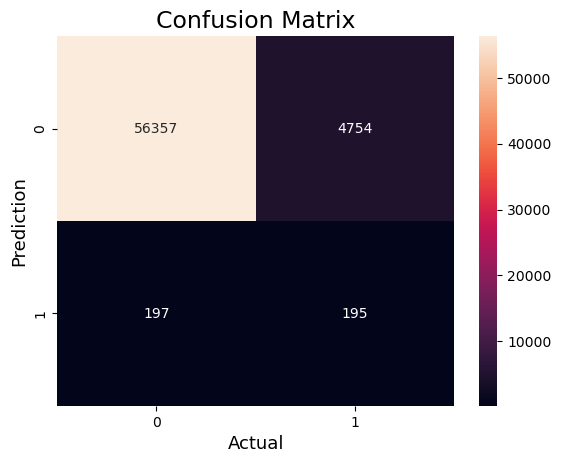

In [57]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 

confusion_matrix = confusion_matrix(predict_train, y_test)

sns.heatmap(confusion_matrix, 
            annot=True,
            fmt='g', 
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

**Random Forest**

In [58]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

# fit the model with the training data
model.fit(X_train, y_train)
predict_train = model.predict(X_test)
accuracy_train = accuracy_score(y_test,predict_train)
print(f"Accuracy : {accuracy_train}")

Accuracy : 0.9195486399037446


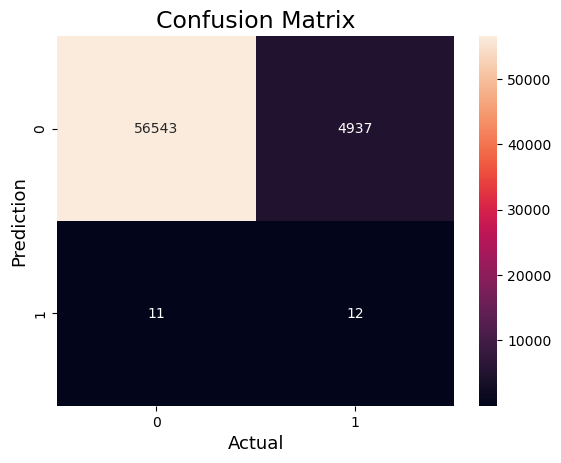

In [59]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 

confusion_matrix = confusion_matrix(predict_train, y_test)

sns.heatmap(confusion_matrix, 
            annot=True,
            fmt='g', 
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

**Logistic Regression**

In [60]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# fit the model with the training data
model.fit(X_train, y_train)
predict_train = model.predict(X_test)
accuracy_train = accuracy_score(y_test,predict_train)
print(f"Accuracy : {accuracy_train}")

Accuracy : 0.9195323805342829


/Users/whs9801/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


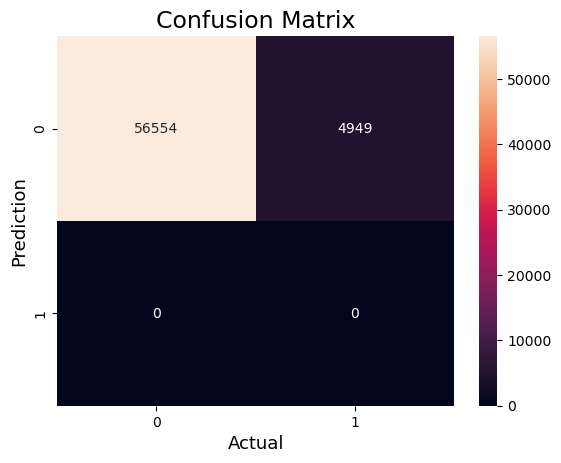

In [61]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 

confusion_matrix = confusion_matrix(predict_train, y_test)

sns.heatmap(confusion_matrix, 
            annot=True,
            fmt='g', 
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

**CatBoost Classifier**

In [53]:
pip install catboost

  Using cached catboost-1.2.3-cp310-cp310-macosx_11_0_universal2.whl.metadata (1.2 kB)
Using cached catboost-1.2.3-cp310-cp310-macosx_11_0_universal2.whl (26.2 MB)

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [62]:
from catboost import CatBoostClassifier

model = CatBoostClassifier()

# fit the model with the training data
model.fit(X_train, y_train)
predict_train = model.predict(X_test)
accuracy_train = accuracy_score(y_test,predict_train)
print(f"Accuracy : {accuracy_train}")

Learning rate set to 0.108111
0:	learn: 0.5863162	total: 49.3ms	remaining: 49.2s
1:	learn: 0.5071959	total: 91.7ms	remaining: 45.7s
2:	learn: 0.4494288	total: 137ms	remaining: 45.4s
3:	learn: 0.4044270	total: 188ms	remaining: 46.8s
4:	learn: 0.3692381	total: 241ms	remaining: 47.9s
5:	learn: 0.3424442	total: 299ms	remaining: 49.5s
6:	learn: 0.3244257	total: 348ms	remaining: 49.4s
7:	learn: 0.3098168	total: 398ms	remaining: 49.4s
8:	learn: 0.2971142	total: 448ms	remaining: 49.3s
9:	learn: 0.2879345	total: 496ms	remaining: 49.1s
10:	learn: 0.2810407	total: 539ms	remaining: 48.4s
11:	learn: 0.2755021	total: 582ms	remaining: 47.9s
12:	learn: 0.2711830	total: 625ms	remaining: 47.5s
13:	learn: 0.2682751	total: 669ms	remaining: 47.1s
14:	learn: 0.2654241	total: 711ms	remaining: 46.7s
15:	learn: 0.2628816	total: 757ms	remaining: 46.6s
16:	learn: 0.2607390	total: 802ms	remaining: 46.4s
17:	learn: 0.2590868	total: 888ms	remaining: 48.4s
18:	learn: 0.2577163	total: 942ms	remaining: 48.6s
19:	learn

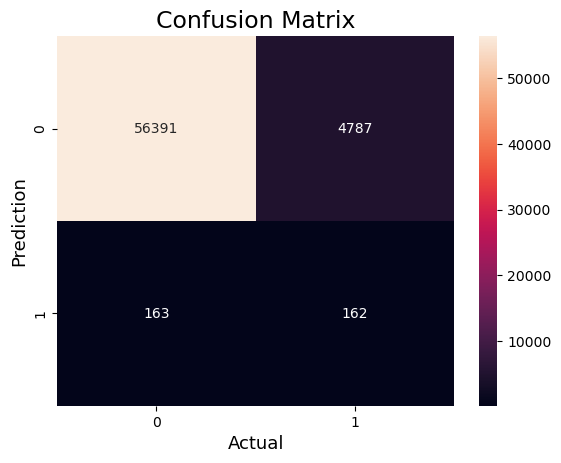

In [63]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 

confusion_matrix = confusion_matrix(predict_train, y_test)

sns.heatmap(confusion_matrix, 
            annot=True,
            fmt='g', 
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

## Prediction and Submission

In [64]:
model = RandomForestClassifier()

model.fit(X, y)
predict_test = model.predict(test)
submission = pd.DataFrame({'SK_ID_CURR': sample_submission['SK_ID_CURR'], 'TARGET': predict_test})
submission.to_csv('submission.csv', index=False)